In [2]:
from matplotlib import pyplot as plt
import numpy as np
from numpy.random import default_rng

seed = 123
rng = default_rng(seed)


In [3]:
def random_tau(seed,n):
    """
    Generate random optical depth for the particle to move
    
    Returns:    
        float: optical depth
        
    """
    rng = default_rng(seed)
    eta_1 = rng.uniform(0, 1,n)
    tau = -np.log(1-eta_1)

    return tau

In [4]:
#how many random numbers to pull?
n_random = 100000

#generate random optical depths
tau = random_tau(seed,n_random)
print(tau.max(),tau.min())

12.457749451835612 1.6087449116568656e-05


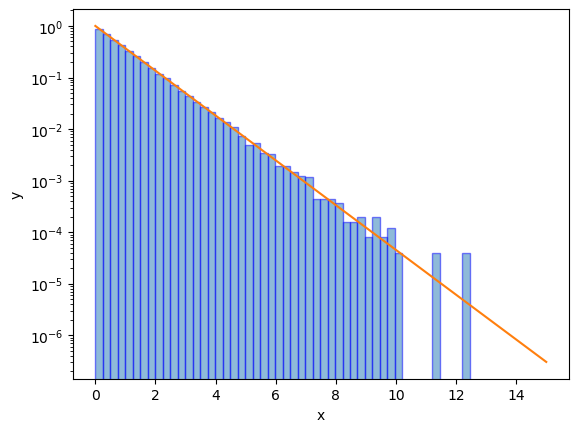

In [5]:
#how many bins to use?
nbins = 50

#use matplotlib.pyplot.hist
n,bins,patches = plt.hist(tau,bins=nbins,density=True,ec="blue",alpha=0.5)

#overplot a line
xx = np.linspace(0,15,1000)
yy = np.exp(-xx)
plt.plot(xx,yy)
plt.yscale('log')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


In [6]:
Rwwwp = np.loadtxt('int_table.txt')
print(Rwwwp.shape)

(1001, 1001)


Text(0, 0.5, "$w'$")

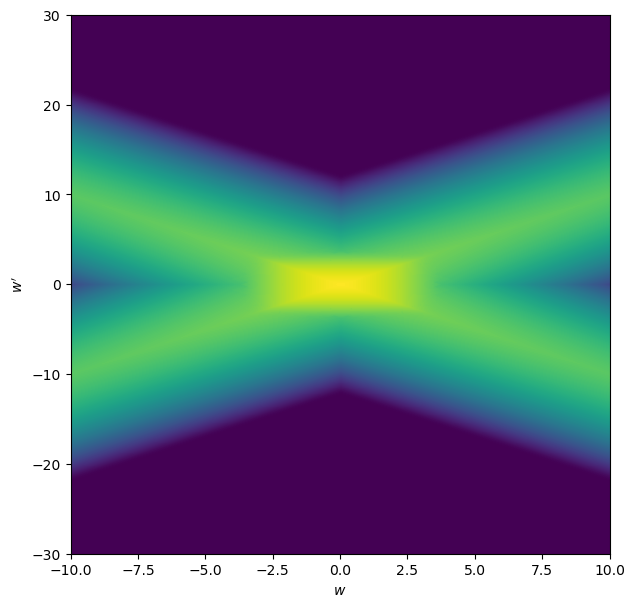

In [20]:
fig = plt.figure(figsize=(7,7))
plt.imshow(np.log(Rwwwp+1.0e-24),extent=[-10,10,-30,30],origin="lower")
plt.gca().set_aspect(0.3333)
plt.xlabel(r'$w$')
plt.ylabel(r"$w'$")

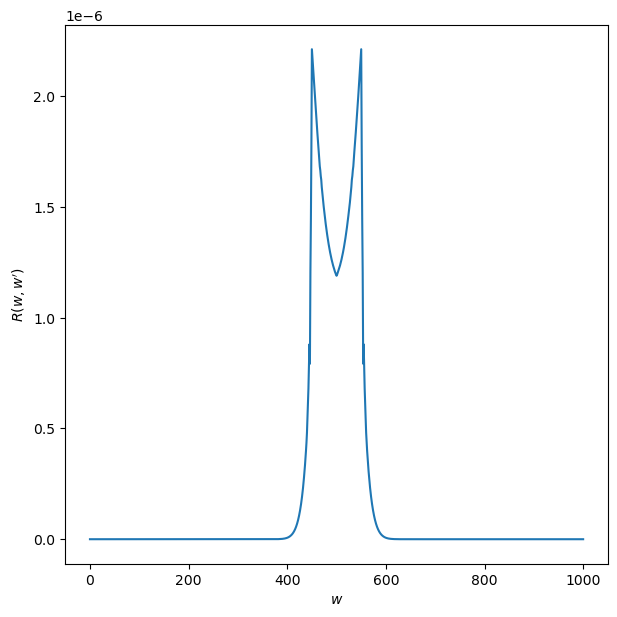

In [19]:
# Lets plot a column
fig = plt.figure(figsize=(7,7))
plt.plot(Rwwwp[:,650])
plt.xlabel(r'$w$')
plt.ylabel(r"$R(w,w')$")
plt.show()

In [27]:
R_N = np.loadtxt('../Rwwp_normalized.txt')
print(Rwwwp.shape)

(1001, 1001)


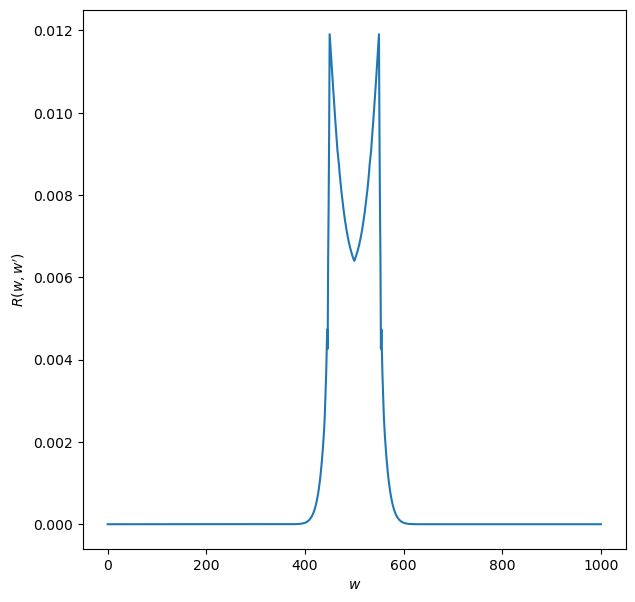

In [28]:
# Lets plot a column
fig = plt.figure(figsize=(7,7))
plt.plot(R_N[:,650])
plt.xlabel(r'$w$')
plt.ylabel(r"$R(w,w')$")
plt.show()

In [34]:
#what is our range of w,w'?
w_min  = -10.0
w_max  =  10.0
wp_min = -30.0
wp_max =  30.0

#how many samples in each direction?
n_w  = 1001
n_wp = 1001

#produce arrays of w, w'
w = np.linspace(w_min,w_max,n_w)
wp = np.linspace(wp_min, wp_max, n_wp)

Rwwp = R_N
Rint = np.zeros_like(Rwwp)

for i in range(n_w):
    for j in range(1,n_wp):
        Rint[j,i] = 0.5*(Rwwp[j-1,i] + Rwwp[j,i])*(wp[j]-wp[j-1]) + Rint[j-1,i] 

Text(0, 0.5, "$w'$")

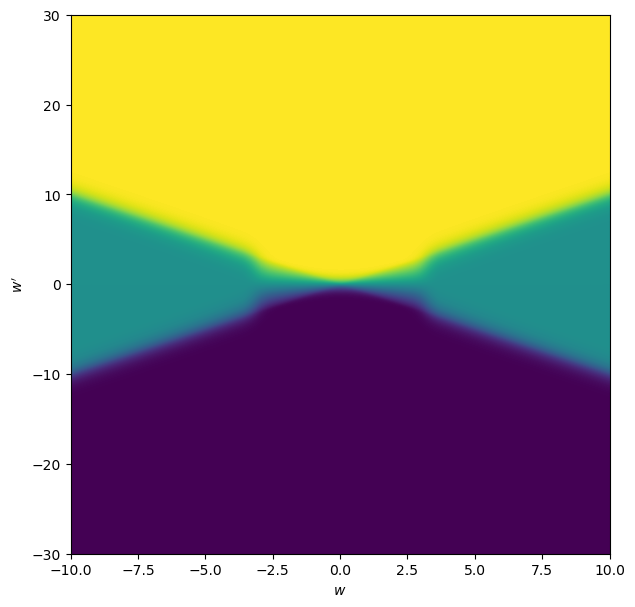

In [35]:
fig = plt.figure(figsize=(7,7))
plt.imshow(Rint,extent=[-10,10,-30,30],origin="lower")
plt.gca().set_aspect(0.33333)
plt.xlabel(r'$w$')
plt.ylabel(r"$w'$")

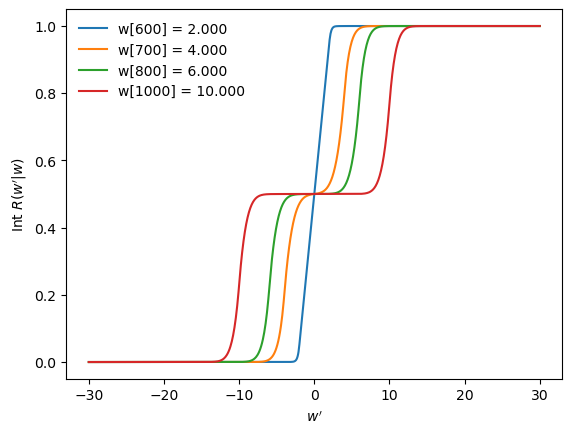

In [37]:
Rint = Rint/0.06

i = 600
s = "w[%d] = %4.3f" % (i,w[i])
plt.plot(wp,Rint[:,i],label=s)

i = 700
s = "w[%d] = %4.3f" % (i,w[i])
plt.plot(wp,Rint[:,i],label=s)
i = 800
s = "w[%d] = %4.3f" % (i,w[i])
plt.plot(wp,Rint[:,i],label=s)

i = 1000
s = "w[%d] = %4.3f" % (i,w[i])
plt.plot(wp,Rint[:,i],label=s)

plt.ylabel(r"Int $R(w'|w)$")
plt.xlabel(r"$w'$")

plt.legend(frameon=False)